<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/Desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Decision tree in scratch 

[Problem 1] Function for finding impureness

[Problem 2] Function for finding information gain

[Problem 3] Learning

[Question 4] Presumption

In [6]:
import numpy as np
import collections

class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
          self.thresholds = np.unique(X[:,feature_index])
          for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

    def _calc_gini(self, y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
          _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

In [7]:
#Data preperation
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [8]:
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold -1.7515301390907223 gain [0.00731408]
feature 0 threshold -1.4411814987202742 gain [0.02251218]
feature 0 threshold -1.2860071785350489 gain [0.04684966]
feature 0 threshold -1.130832858349825 gain [0.05540668]
feature 0 threshold -0.9756585381645996 gain [0.09211504]
feature 0 threshold -0.8204842179793755 gain [0.10231571]
feature 0 threshold -0.6653098977941516 gain [0.15130192]
feature 0 threshold -0.5101355776089262 gain [0.19945398]
feature 0 threshold -0.3549612574237022 gain [0.226875]
feature 0 threshold -0.19978693723847682 gain [0.24335127]
feature 0 threshold -0.04461261705325283 gain [0.29815868]
feature 2 threshold -0.8847917866032504 gain [0.40569814]
feature 2 threshold -0.7477475602174614 gain [0.44940972]
feature 2 threshold 0.005995684904378294 gain [0.4971875]


In [9]:
prediction_scratch = clf.predict(X_test)
print (prediction_scratch)

[1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1]


In [10]:
# Decision tree in scratch vs Decision tree of scikit-learn

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table(prediction_result, model_name, table_name, y_test):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

from sklearn import tree
# define models and parameters
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=1).fit(X_train, y_train)
prediction_DT = model.predict(X_test)

evaluation_table = pd.DataFrame(columns = ('accuracy', 'precision', 'recall', 'F1 score'))
evaluation_table = calculate_metrics_add_to_table(prediction_DT, 'DT scikit-learn', evaluation_table, y_test)
evaluation_table = calculate_metrics_add_to_table(prediction_scratch, 'DT scratch', evaluation_table, y_test)

print(evaluation_table)


                 accuracy  precision  recall  F1 score
DT scikit-learn       1.0        1.0     1.0       1.0
DT scratch            1.0        1.0     1.0       1.0


[Problem 6] Visualization of decision area

In [ ]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

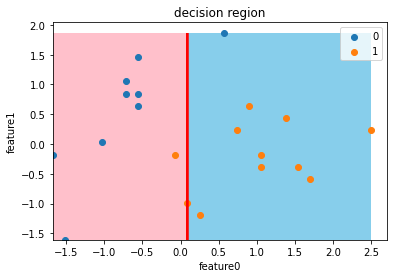

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X_test, y_test, clf)

[Problem 7] (Advance task) Creation of a decision tree classifier class with a depth of 2

In [56]:
#Implementation of TreeNode 
import statistics

class TreeNode():
    def __init__(self, max_depth = None, verbose = False):
      """
      インスタンス変数初期化
      """
      self.max_depth = max_depth 
      self.verbose = verbose
      self.feature = None
      #print ('test')

    def fit(self, X, y, depth):
       #分岐計算
       self.depth = depth

       if self.depth >= self.max_depth:
         self.label = statistics.mode(y)
         return

       self.gain = 0
       for feature_index in range(X.shape[1]):
          self.thresholds = np.unique(X[:,feature_index])
          for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

       if self.depth < self.max_depth:  
            self.left = TreeNode(self.max_depth, self.verbose)
            self.right = TreeNode(self.max_depth, self.verbose)
            X_l = X[X[:,self.feature] < self.threshold]
            Y_l = y[X[:,self.feature] < self.threshold]
            X_r = X[X[:,self.feature] >= self.threshold]           
            Y_r = y[X[:,self.feature] >= self.threshold]
            self.left.fit(X_l, Y_l, depth + 1)
            self.right.fit(X_r, Y_r, depth + 1)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        if self.depth < self.max_depth or self.feature is not None:
          prediction = np.where(X[:,self.feature] < self.threshold,self.left.predict(X),self.right.predict(X))
          return prediction 
        else: 
          return self.label

    def _calc_gini(self, y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
          _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

In [54]:
# Implementation of DT with nodes
class ScratchDecesionTreeClassifier():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, max_depth = 1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.depth = 0
        self.root = TreeNode(self.max_depth, self.verbose)
        self.root.fit(X, y, self.depth)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        prediction = self.root.predict(X)
        return prediction

In [57]:
#Data preperation

X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

clf = ScratchDecesionTreeClassifier(verbose = False, max_depth=2)
clf.fit(X_train,y_train)

prediction_scratch = clf.predict(X_test)
print (prediction_scratch.tolist())

[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]


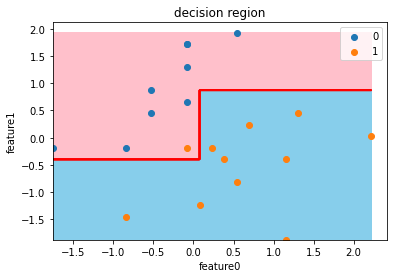

In [58]:
#Plotting 
decision_region(X_test, y_test, clf)

In [66]:
class TreeNodeInf():
    def __init__(self, max_depth = None, verbose = False):
      """
      インスタンス変数初期化
      """
      self.max_depth = max_depth 
      self.verbose = verbose
      self.feature = None
      #print ('test')

    def fit(self, X, y, depth):
       #分岐計算
       self.depth = depth
       
       if len(np.unique(y))  == 1:
            self.label = np.unique(y)[0]
            return
       
       if self.depth == self.max_depth:
         self.label = statistics.mode(y)
         return
        
       self.gain = 0
       self.left = TreeNode(self.max_depth, self.verbose)
       for feature_index in range(X.shape[1]):
          self.thresholds = np.unique(X[:,feature_index])
          for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)
        
       self.left = TreeNodeInf(self.max_depth, self.verbose)
       self.right = TreeNodeInf(self.max_depth, self.verbose)
       X_l = X[X[:,self.feature] < self.threshold]
       Y_l = y[X[:,self.feature] < self.threshold]
       X_r = X[X[:,self.feature] >= self.threshold]
       Y_r = y[X[:,self.feature] >= self.threshold]
       self.left.fit(X_l, Y_l, depth + 1)
       self.right.fit(X_r, Y_r, depth + 1)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """

        if self.depth == self.max_depth or self.feature is None:
          return self.label
        else:
          prediction = np.where(X[:,self.feature] < self.threshold,self.left.predict(X),self.right.predict(X))
          return prediction

    def _calc_gini(self, y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
          _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

In [64]:
class ScratchDecesionTreeClassifierInf():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, max_depth = 1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.depth = 0
        self.root = TreeNodeInf(self.max_depth, self.verbose)
        self.root.fit(X, y, self.depth)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        prediction = self.root.predict(X)
        return prediction

[Problem 8] (Advance task) Creation of decision tree classifier class with unlimited depth

[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]


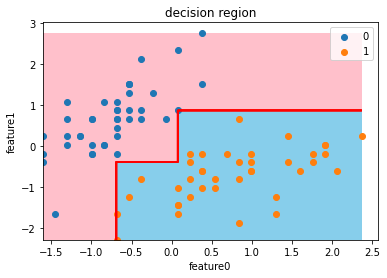

In [68]:
clf = ScratchDecesionTreeClassifierInf(verbose = False, max_depth=None)
clf.fit(X_train,y_train)

prediction_scratch = clf.predict(X_test)
print (prediction_scratch.tolist())

#Plotting 
decision_region(X_train, y_train, clf)